<a href="https://colab.research.google.com/github/krunal16-c/MachineLearningProjects/blob/main/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*importing libraries*

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [6]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
# printing the last five rows of dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
# number of rows and colums
gold_data.shape

(2290, 6)

In [9]:
# gettiing the info of data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
# stats of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correlation <br/>
1.postive <br/>
2.negative

In [13]:
# finding co-relation
correlation = gold_data.corr()

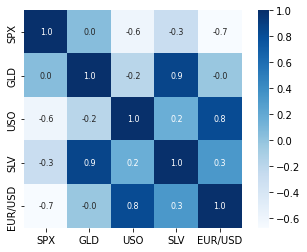

In [14]:
# making heat map to understand correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True, square=True, fmt= '.1f', annot=True, annot_kws= {'size':8},cmap='Blues')

In [15]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


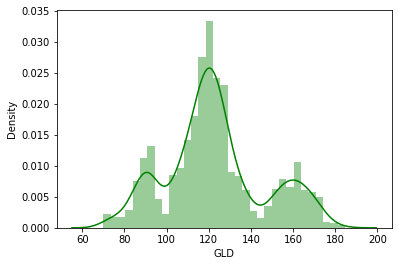

In [16]:
# checking the distribution of the gld price
sns.distplot(gold_data['GLD'],color='green')

splitting the features and target


In [19]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [21]:
print(X)
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [22]:
# spiltting into traing and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [25]:
# training the model using random forest regressor
regressor = RandomForestRegressor(n_estimators=100)




In [26]:
# training the model
regressor.fit(X_train,Y_train)


RandomForestRegressor()

Model evaluation based on test data

In [27]:
test_data_prediction = regressor.predict(X_test)

In [28]:
print(test_data_prediction)

[168.36019904  81.87719999 115.96029974 127.58380102 120.7838012
 154.72969753 150.18699898 126.02310089 117.51449878 126.02270106
 116.631501   172.00840084 141.88009888 168.25529905 115.26310041
 117.67840067 138.61850313 170.0574009  159.29370277 156.16969851
 154.98810019 125.18840012 176.35599968 157.49250308 125.23780056
  93.67969974  77.36590028 121.12990014 119.09449918 167.52110014
  88.19370064 125.38980032  91.27030017 117.68859988 121.07739908
 136.19420094 115.56880116 114.69610095 148.3253993  107.48840061
 104.34490221  87.13439816 126.57620025 118.26850023 151.94559863
 119.70289992 108.38430013 108.04979837  93.21080059 127.1099978
  74.6533003  113.66539853 121.43160034 111.47969919 118.92339883
 120.69039928 159.81270041 167.87280119 146.8936969   85.71119872
  94.24910019  86.78319907  90.45150014 118.894501   126.32450077
 127.47559985 169.95019967 122.2659994  117.24009906  98.74320025
 167.67630055 143.06339836 131.80660247 121.11010208 121.27129975
 119.7933005

In [31]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error: ",error_score)

R squared error:  0.9890481714421148


comparing the actual values and predicted values in a plot


In [32]:
Y_test = list(Y_test)

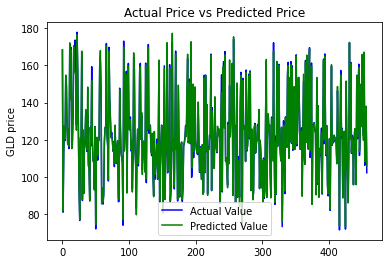

In [34]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.ylabel('GLD price')
plt.legend()
plt.show()